In [7]:
import pandas as pd

# Chemins des fichiers
file1_path = "Batch_1_train_labels_clean.csv"
file2_path = "Batch_2_train_labels_clean.csv"
file3_path = 'image_labels_batch_3.xlsx'
file4_path = 'image_labels_batch_4.xlsx'

# Chargement des fichiers
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)
df3 = pd.read_excel(file3_path)
df4 = pd.read_excel(file4_path)

# Aperçu des premières lignes de chaque fichier
df1_head = df1.head()
df2_head = df2.head()

# Vérification des dimensions
df1_shape = df1.shape
df2_shape = df2.shape

df1_head, df1_shape, df2_head, df2_shape


(                           image_name     category            subcategory
 0     image_631246_product_984304.jpg     Nintendo  Jeux Game Boy Advance
 1     image_659698_product_822774.jpg  PlayStation               Jeux PS1
 2   image_1063831_product_1157144.jpg         SEGA          Master System
 3   image_54547530_product_929584.jpg    PC Gaming                Jeux PC
 4  image_62369530_product_2242928.jpg         SEGA                    NaN,
 (117, 3),
                               image_name     category            subcategory
 0   image_874729307_product_74244625.jpg    PC Gaming                Jeux PC
 1   image_874730792_product_49132716.jpg     Nintendo  Jeux Game Boy Advance
 2   image_874731199_product_74093483.jpg  PlayStation               Jeux PS3
 3   image_874731370_product_49948298.jpg     Nintendo  Jeux Game Boy Advance
 4  image_881487935_product_126111824.jpg     Nintendo       Jeux Nintendo DS,
 (117, 3))

C:\Users\Daigona\AppData\Local\Temp\ipykernel_17412\1207481092.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
C:\Users\Daigona\AppData\Local\Temp\ipykernel_17412\1207481092.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_counts[:10].index, y=subcategory_counts[:10].values, palette="coolwarm")


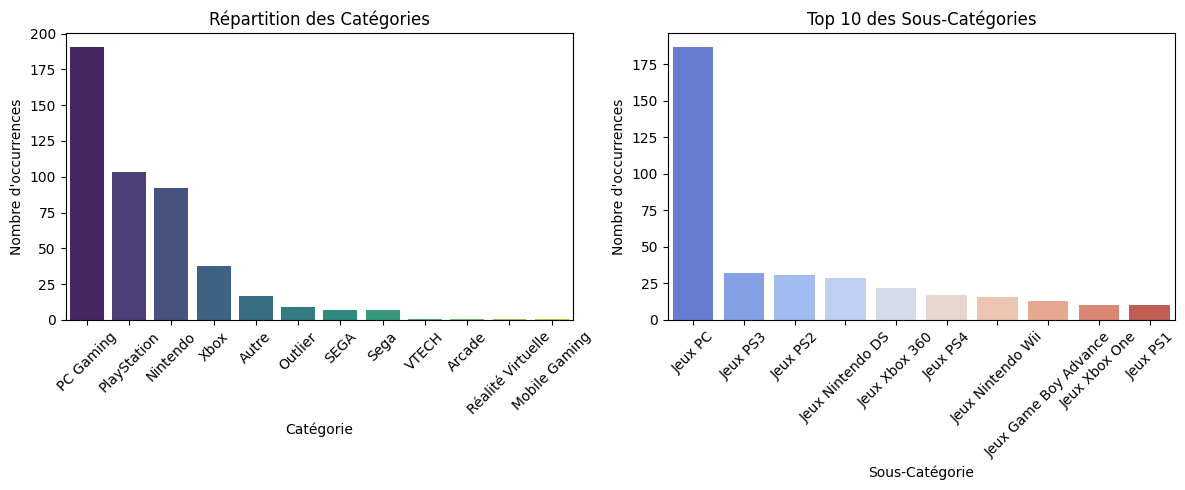

(image_name     0
 category       0
 subcategory    3
 dtype: int64,
 (468, 3))

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fusion des deux fichiers en un seul DataFrame
df = pd.concat([df1, df2, df3,df4], ignore_index=True)

# Vérification des valeurs manquantes
missing_values = df.isnull().sum()

# Comptage des catégories et sous-catégories
category_counts = df["category"].value_counts()
subcategory_counts = df["subcategory"].value_counts()

# Affichage des graphiques
plt.figure(figsize=(12, 5))

# Graphique des catégories
plt.subplot(1, 2, 1)
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Répartition des Catégories")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'occurrences")

# Graphique des sous-catégories (top 10)
plt.subplot(1, 2, 2)
sns.barplot(x=subcategory_counts[:10].index, y=subcategory_counts[:10].values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 des Sous-Catégories")
plt.xlabel("Sous-Catégorie")
plt.ylabel("Nombre d'occurrences")

plt.tight_layout()
plt.show()

missing_values, df.shape


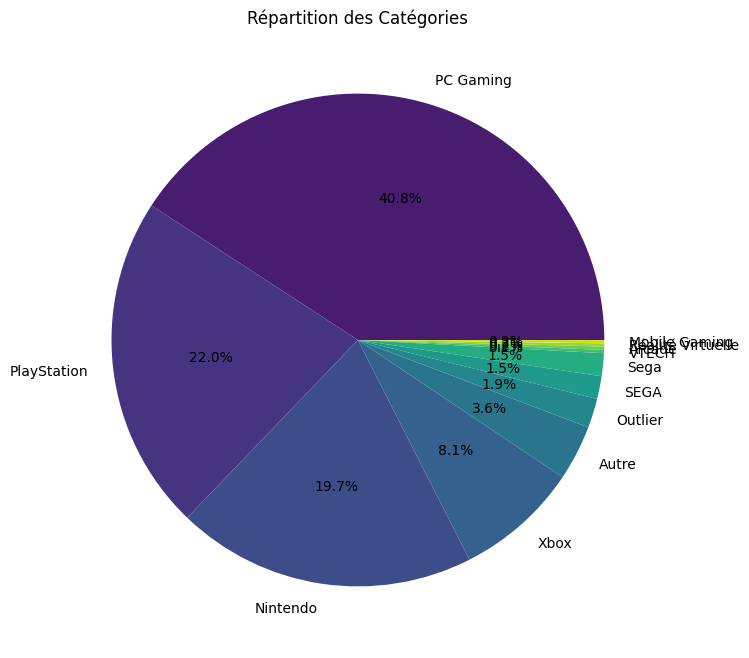

Nuage de mots des Sous-Catégories


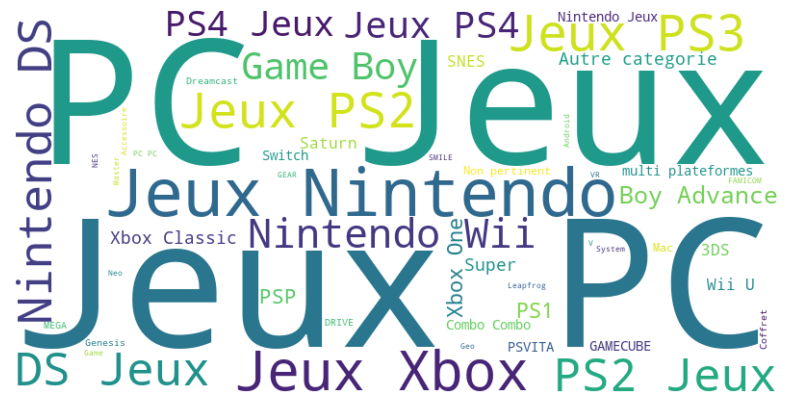

<Figure size 1200x600 with 0 Axes>

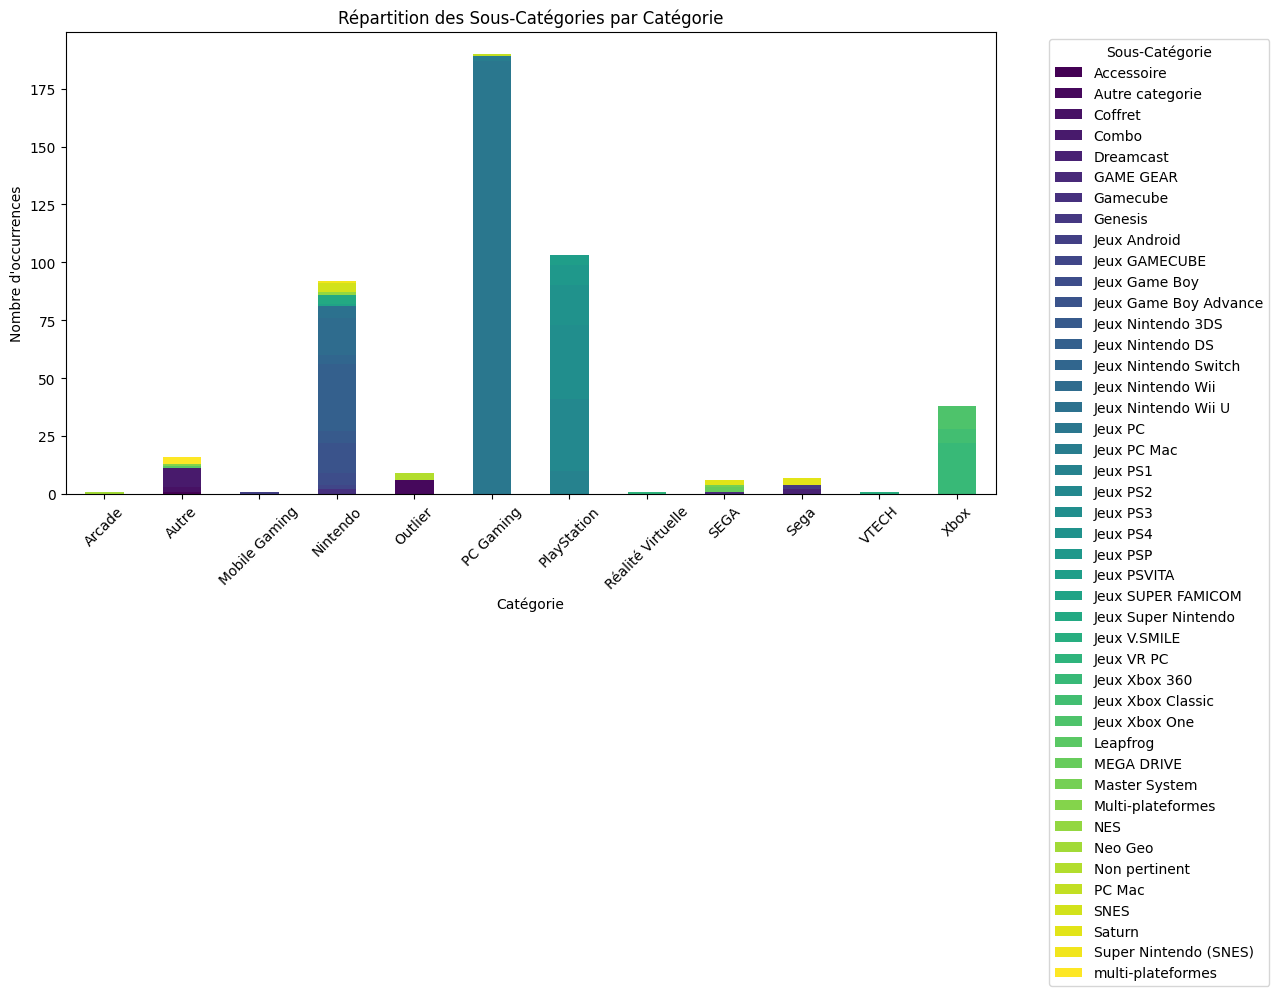

In [9]:
from wordcloud import WordCloud



    
# Création d'un pie chart des catégories
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(category_counts)))
plt.title("Répartition des Catégories")
plt.show()

# Création d'un nuage de mots des sous-catégories
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["subcategory"].dropna()))


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
print("Nuage de mots des Sous-Catégories")
plt.show()

# Graphique en barres empilées des sous-catégories par catégorie
plt.figure(figsize=(12, 6))
df_pivot = df.groupby(["category", "subcategory"]).size().unstack().fillna(0)
df_pivot.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))
plt.title("Répartition des Sous-Catégories par Catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'occurrences")
plt.legend(title="Sous-Catégorie", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()
